## SKLearn
### Задание 1
##### Импортируйте библиотеки pandas, numpy и matplotlib. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42. Масштабируйте данные с помощью StandardScaler. Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split#, GridSearchCV
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [11]:
boston = load_boston()

In [12]:
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [13]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [17]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [18]:
X_train_scaled_tsne = tsne.fit_transform(X_train_scaled)

In [19]:
X_train_scaled_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

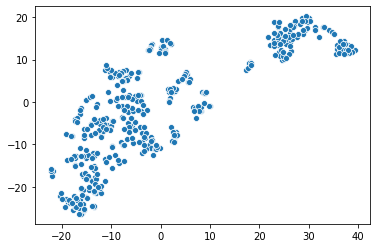

In [20]:
sns.scatterplot(X_train_scaled_tsne[:, 0], X_train_scaled_tsne[:, 1])

### Задание 2
##### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения price и CRIM в разных кластерах.

In [21]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [24]:
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

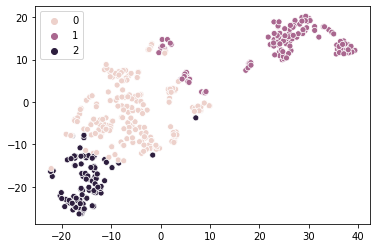

In [26]:
sns.scatterplot(X_train_scaled_tsne[:, 0], X_train_scaled_tsne[:, 1], hue=labels_train)

In [56]:
for i in pd.unique(np.sort(labels_train)):
    print(f'Cluster id:       {i}\n'
          f'Av. houses price: {np.around(y_train.loc[labels_train==i, "price"].mean(), 1)}\n'
          f'Av. criminality:  {np.around(X_train.loc[labels_train==i, "CRIM"].mean(), 1)}\n')

Cluster id:       0
Av. houses price: 25.0
Av. criminality:  0.4

Cluster id:       1
Av. houses price: 16.2
Av. criminality:  10.8

Cluster id:       2
Av. houses price: 27.8
Av. criminality:  0.1



### * Задание 3
##### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [67]:
labels_test = kmeans.predict(X_test_scaled)
pd.value_counts(labels_test)

0    51
1    35
2    16
dtype: int64

In [68]:
for i in pd.unique(np.sort(labels_test)):
    print(f'Cluster id:       {i}\n'
          f'Av. houses price: {np.around(y_test.loc[labels_test==i, "price"].mean(), 1)}\n'
          f'Av. criminality:  {np.around(X_test.loc[labels_test==i, "CRIM"].mean(), 1)}\n')

Cluster id:       0
Av. houses price: 21.9
Av. criminality:  0.3

Cluster id:       1
Av. houses price: 16.4
Av. criminality:  10.2

Cluster id:       2
Av. houses price: 31.4
Av. criminality:  0.1



##### Comparison train and test data

In [93]:
X_test_scaled_tsne = tsne.fit_transform(X_test_scaled)

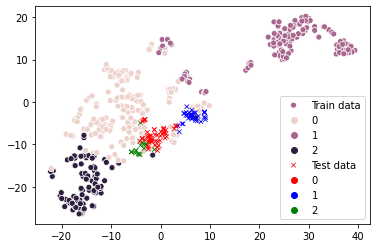

In [91]:
sns.scatterplot(X_train_scaled_tsne[:, 0], X_train_scaled_tsne[:, 1], hue=labels_train, label='Train data')
sns.scatterplot(X_test_scaled_tsne[:, 0], X_test_scaled_tsne[:, 1], marker='x', hue=labels_test, s=20, palette=['red', 'blue', 'green'], label='Test data')
plt.show()

In [132]:
train_numbers = np.around(100 * pd.value_counts(labels_train) / len(labels_train), 1)
test_numbers = np.around(100 * pd.value_counts(labels_test) / len(labels_test), 1)
print(' ' * 18, 'Train Data:   Test Data:')
for i in pd.unique(np.sort(labels_test)):
    print(f'Amount:               {train_numbers[i]:<4} %', ' ' * 5, f'{test_numbers[i]:<4} %\n'
          f'Cluster id:           {i}', ' ' * 10, f'{i}\n'
          f'Av. houses price:     {np.around(y_train.loc[labels_train==i, "price"].mean(), 1):<4}', ' ' * 7, f'{np.around(y_test.loc[labels_test==i, "price"].mean(), 1):<4}\n'
          f'Av. criminality:      {np.around(X_train.loc[labels_train==i, "CRIM"].mean(), 1):<4}', ' ' * 7, f'{np.around(X_test.loc[labels_test==i, "CRIM"].mean(), 1):<4}\n')


                   Train Data:   Test Data:
Amount:               47.3 %       50.0 %
Cluster id:           0            0
Av. houses price:     25.0         21.9
Av. criminality:      0.4          0.3 

Amount:               31.4 %       34.3 %
Cluster id:           1            1
Av. houses price:     16.2         16.4
Av. criminality:      10.8         10.2

Amount:               21.3 %       15.7 %
Cluster id:           2            2
Av. houses price:     27.8         31.4
Av. criminality:      0.1          0.1 

